In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
import math
import sys
from scipy.special import expit
from sklearn.svm import SVC

In [ ]:
data_ = pd.read_csv('/content/gdrive/My Drive/CS5691/assignment-2/datasets/Dataset_3_Team_33.csv')

In [ ]:
data_0 = data_[data_['Class_label'] == 0]
data_1 = data_[data_['Class_label'] == 1]

data_0 = data_0.values
data_1 = data_1.values

In [ ]:
data_train, data_test = train_test_split(data_, test_size = 0.25)

In [ ]:
data_train = data_train.values
data_test = data_test.values

In [ ]:
x_train = data_train[:, 0:2]
y_train = data_train[:, 2]

x_test = data_test[:, 0:2]
y_test = data_test[:, 2]

In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# SECTION: KERNEL LOGISTIC REGRESSION IMPLEMENTATION

In [ ]:
def line_kernel(x_perc, x_eval):
  linKer = x_perc @ x_eval.T
  
  return linKer

In [ ]:
def poly_kernel(x_perc, x_eval, C, degree):
  polKer = (x_perc @ x_eval.T + C)**degree
  
  return polKer

In [ ]:
def LogisticReg(x_perc, y_perc, mode):
  omegas = np.zeros((x_perc.shape[0], 1))
  C = 1
  degree = 2
  if mode == 1:
    kerMat = line_kernel(x_perc, x_perc)
  elif mode == 2:
    kerMat = poly_kernel(x_perc, x_perc, C, degree)
  
  alpha = 0.001
  for i in range(100000):
    index = np.random.randint(0, x_perc.shape[0], 1)
    deltaL = (expit(omegas.T @ kerMat[:, index]) - y_perc[index]) * kerMat[:, index]
    omegas = omegas - alpha * deltaL
  
  return omegas, mode, C, degree

In [ ]:
def pred_LogReg(x_perc, x_eval, mode, C, degree, omegas):
  if mode == 1:
    kerMat = line_kernel(x_perc, x_eval)
  elif mode == 2:
    kerMat = poly_kernel(x_perc, x_eval, C, degree)
  p_exp = omegas.T @ kerMat
  # pi = 1 / (1 + np.exp(-1 * p_exp))
  pi = expit(p_exp).T
  y_predict = np.zeros(pi.shape)
  for i in range(x_eval.shape[0]):
    if pi[i] > 0.5:
      y_predict[i] = 1
    else:
      y_predict[i] = 0

  return y_predict

In [ ]:
def scorePred(y_predict, y_eval):
  count = 0
  decount = 0
  for i in range(y_predict.shape[0]):
    if y_predict[i] == y_eval[i]:
      count += 1
    elif y_predict[i] != y_eval[i]:
      decount += 1
  print(count, decount)
  accuracy = count / y_eval.shape[0]
  incorrect = decount / y_eval.shape[0]

  return accuracy, incorrect

In [ ]:
# LINEAR KERNEL

In [ ]:
omegas_pred_lin, mode_pred_lin, C_pred_lin, degree_pred_lin = LogisticReg(x_train, y_train, 1)

In [ ]:
y_trainpred_lin = pred_LogReg(x_train, x_train, mode_pred_lin, C_pred_lin, degree_pred_lin, omegas_pred_lin, )

In [ ]:
y_testpred_lin = pred_LogReg(x_train, x_test, mode_pred_lin, C_pred_lin, degree_pred_lin, omegas_pred_lin)

In [ ]:
train_accu_lin, train_incorr_lin = scorePred(y_trainpred_lin, y_train)
test_accu_lin, test_incorr_lin = scorePred(y_testpred_lin, y_test)

361 389
132 118


In [ ]:
print('Train accu:', train_accu_lin)
print('Train incorr:', train_incorr_lin)
print('Test accu:', test_accu_lin)
print('Test incorr:', test_incorr_lin)

Train accu: 0.48133333333333334
Train incorr: 0.5186666666666667
Test accu: 0.528
Test incorr: 0.472


In [ ]:
ConMat1 = np.zeros((2,2))

In [ ]:
for i in range(y_testpred_lin.shape[0]):
  ConMat1[int(y_testpred_lin[i]), int(y_test[i])] += 1

In [ ]:
print('Confusion Matrix, LogReg, Poly Kernel: \n', ConMat1)

Confusion Matrix, LogReg, Poly Kernel: 
 [[72. 57.]
 [61. 60.]]


In [ ]:
# POLYNOMIAL KERNEL, CONSTANT = 1, DEGREE = 2

In [ ]:
omegas_pred_pol, mode_pred_pol, C_pred_pol, degree_pred_pol = LogisticReg(x_train, y_train, 2)

In [ ]:
y_trainpred_pol = pred_LogReg(x_train, x_train, mode_pred_pol, C_pred_pol, degree_pred_pol, omegas_pred_pol)

In [ ]:
y_testpred_pol = pred_LogReg(x_train, x_test, mode_pred_pol, C_pred_pol, degree_pred_pol, omegas_pred_pol)

In [ ]:
train_accu_pol, train_incorr_pol = scorePred(y_trainpred_pol, y_train)
test_accu_pol, test_incorr_pol = scorePred(y_testpred_pol, y_test)

736 14
245 5


In [ ]:
print('Train accu:', train_accu_pol)
print('Train incorr:', train_incorr_pol)
print('Test accu:', test_accu_pol)
print('Test incorr:', test_incorr_pol)

Train accu: 0.9813333333333333
Train incorr: 0.018666666666666668
Test accu: 0.98
Test incorr: 0.02


In [ ]:
ConMat2 = np.zeros((2,2))

In [ ]:
for i in range(y_testpred_pol.shape[0]):
  ConMat2[int(y_testpred_pol[i]), int(y_test[i])] += 1

In [ ]:
print('Confusion Matrix, LogReg, Poly Kernel: \n', ConMat2)

Confusion Matrix, LogReg, Poly Kernel: 
 [[129.   1.]
 [  4. 116.]]


In [ ]:
# SECTION: PLOTTING THE DECISION BOUNDARIES FOR BOTH KERNEL CASES, LOGISTIC REGRESSION

In [ ]:
X1 = np.linspace(-1.25, 1.25, 200)
X2 = np.linspace(-1.25, 1.25, 200)
X1, X2 = np.meshgrid(X1, X2)
TempMat = np.zeros((X1.shape[0]**2, 2))
TempMat[:, 0], TempMat[:, 1] = X1.reshape(X1.shape[0]**2), X2.reshape(X2.shape[0]**2)

In [ ]:
DecSurf_lin = pred_LogReg(x_train, TempMat, mode_pred_lin, C_pred_lin, degree_pred_lin, omegas_pred_lin)

DecSurf_lin = DecSurf_lin.reshape(X1.shape[0], X2.shape[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

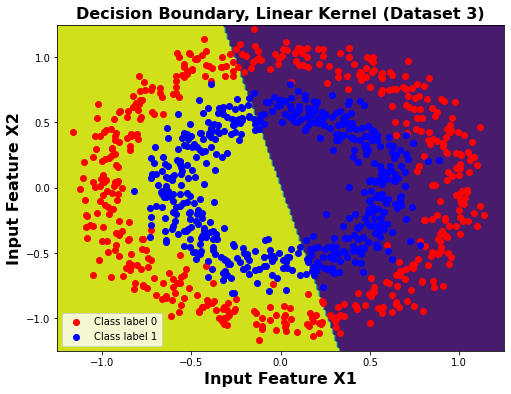

In [ ]:
plt.figure(1, figsize = [8, 6])
plt.contourf(X1, X2, DecSurf_lin)
scatter_0 = plt.scatter(data_0[:, 0], data_0[:, 1], color = 'red', label = 'Class label 0')
scatter_1 = plt.scatter(data_1[:, 0], data_1[:, 1], color = 'blue', label = 'Class label 1')
plt.xlabel('Input Feature X1', fontweight='bold', fontsize=16)
plt.ylabel('Input Feature X2', fontweight='bold', fontsize=16)
plt.legend(handles = [scatter_0, scatter_1], loc = 'lower left')
plt.title('Decision Boundary, Linear Kernel (Dataset 3)', fontweight='bold', fontsize=16)
plt.savefig("Linear_logistic.png")
files.download("Linear_logistic.png")

In [ ]:
DecSurf_pol = pred_LogReg(x_train, TempMat, mode_pred_pol, C_pred_pol, degree_pred_pol, omegas_pred_pol)

DecSurf_pol = DecSurf_pol.reshape(X1.shape[0], X2.shape[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

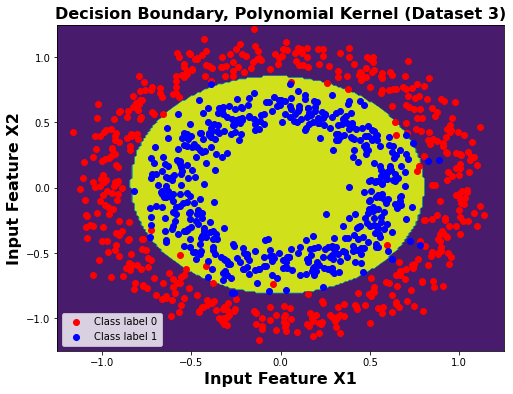

In [ ]:
plt.figure(2, figsize = [8, 6])
plt.contourf(X1, X2, DecSurf_pol)
scatter_0 = plt.scatter(data_0[:, 0], data_0[:, 1], color = 'red', label = 'Class label 0')
scatter_1 = plt.scatter(data_1[:, 0], data_1[:, 1], color = 'blue', label = 'Class label 1')
plt.xlabel('Input Feature X1', fontweight='bold', fontsize=16)
plt.ylabel('Input Feature X2', fontweight='bold', fontsize=16)
plt.legend(handles = [scatter_0, scatter_1], loc = 'lower left')
plt.title('Decision Boundary, Polynomial Kernel (Dataset 3)', fontweight='bold', fontsize=16)
plt.savefig("Poly_logistic.png")
files.download("Poly_logistic.png")

In [ ]:
# SECTION: PROCESSING DATA FOR SVM

In [ ]:
Data_ = pd.read_csv('/content/gdrive/My Drive/CS5691/assignment-2/datasets/Dataset_3_Team_33.csv')

In [ ]:
Data_['Class_label'][Data_['Class_label'] == 0] = -1

Data_0 = Data_[Data_['Class_label'] == -1]
Data_1 = Data_[Data_['Class_label'] == 1]

Data_0 = Data_0.values
Data_1 = Data_1.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Data_train, Data_test = train_test_split(Data_, test_size = 0.25)

In [ ]:
Data_train = Data_train.values
Data_test = Data_test.values

In [ ]:
X_train = Data_train[:, 0:2]
Y_train = Data_train[:, 2]

X_test = Data_test[:, 0:2]
Y_test = Data_test[:, 2]

In [ ]:
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [ ]:
# SECTION: LINEAR KERNEL SVM WITH INBUILT FUNCTION

In [ ]:
clf1 = SVC(C=0.01, kernel='linear')
clf1.fit(X_train, Y_train.ravel())

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('Train accuracy: ', clf1.score(X_train, Y_train))
print('Test accuracy: ', clf1.score(X_test, Y_test))

Train accuracy:  0.516
Test accuracy:  0.452


In [ ]:
Y_pred_lin = clf1.predict(X_test)

In [ ]:
ConMat3 = np.zeros((3,3))

In [ ]:
for i in range(Y_pred_lin.shape[0]):
  ConMat3[int(Y_pred_lin[i])+1, int(Y_test[i])+1] += 1

In [ ]:
print('Confusion Matrix, LogReg, Poly Kernel: \n', ConMat3)

Confusion Matrix, LogReg, Poly Kernel: 
 [[113.   0. 137.]
 [  0.   0.   0.]
 [  0.   0.   0.]]


In [ ]:
# SECTION: PLOTTING THE DECISION BOUNDARIES AND SUPPORT VECTORS, LINEAR KERNEL

In [ ]:
X1 = np.linspace(-1.25, 1.25, 200)
X2 = np.linspace(-1.25, 1.25, 200)
X1, X2 = np.meshgrid(X1, X2)

In [ ]:
DecFunc = clf1.decision_function(np.c_[X1.ravel(), X2.ravel()])
DecFunc = DecFunc.reshape(X1.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

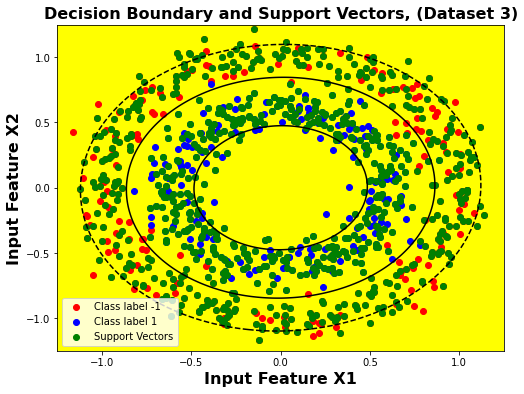

In [ ]:
plt.figure(1, figsize = [8, 6])
plt.contourf(X1, X2, DecFunc > 0, colors = 'yellow')
plt.contour(X1, X2, DecFunc, levels = [-1, 0, 1], colors = 'k')
scatter_0 = plt.scatter(Data_0[:, 0], Data_0[:, 1], color = 'red', label = 'Class label -1')
scatter_1 = plt.scatter(Data_1[:, 0], Data_1[:, 1], color = 'blue', label = 'Class label 1')
scatter_2 = plt.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], color = 'green', marker = 'o', label = 'Support Vectors')
plt.xlabel('Input Feature X1', fontweight='bold', fontsize=16)
plt.ylabel('Input Feature X2', fontweight='bold', fontsize=16)
plt.legend(handles = [scatter_0, scatter_1, scatter_2], loc = 'lower left')
plt.title('Decision Boundary and Support Vectors, (Dataset 3)', fontweight='bold', fontsize=16)
plt.savefig("Linear_SVM.png")
files.download("Linear_SVM.png")
# plt.annotate('Support Vector', xy = (clf.support_vectors_[2,0], clf.support_vectors_[2, 1]), xytext = (3, 1.5), arrowprops = dict(facecolor = 'black', shrink = 0.05))

In [ ]:
# SECTION: LINEAR KERNEL SVM WITH INBUILT FUNCTION

In [ ]:
clf2 = SVC(C=0.01, kernel='poly', degree = 2)
clf2.fit(X_train, Y_train.ravel())

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('Train accuracy: ', clf2.score(X_train, Y_train))
print('Test accuracy: ', clf2.score(X_test, Y_test))

Train accuracy:  0.9746666666666667
Test accuracy:  0.968


In [ ]:
Y_pred_pol = clf2.predict(X_test)

In [ ]:
ConMat4 = np.zeros((3,3))

In [ ]:
for i in range(Y_pred_pol.shape[0]):
  ConMat4[int(Y_pred_pol[i])+1, int(Y_test[i])+1] += 1

In [ ]:
print('Confusion Matrix, LogReg, Poly Kernel: \n', ConMat4)

Confusion Matrix, LogReg, Poly Kernel: 
 [[107.   0.   2.]
 [  0.   0.   0.]
 [  6.   0. 135.]]


In [ ]:
# SECTION: PLOTTING THE DECISION BOUNDARIES AND SUPPORT VECTORS, POLYNOMIAL KERNEL

In [ ]:
DecFunc = clf2.decision_function(np.c_[X1.ravel(), X2.ravel()])
DecFunc = DecFunc.reshape(X1.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

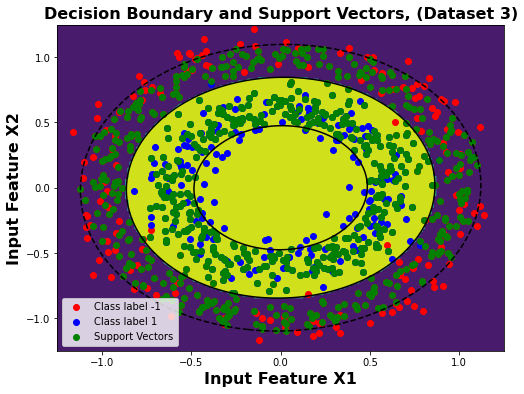

In [ ]:
plt.figure(1, figsize = [8, 6])
plt.contourf(X1, X2, DecFunc > 0)
plt.contour(X1, X2, DecFunc, levels = [-1, 0, 1], colors = 'k')
scatter_0 = plt.scatter(Data_0[:, 0], Data_0[:, 1], color = 'red', label = 'Class label -1')
scatter_1 = plt.scatter(Data_1[:, 0], Data_1[:, 1], color = 'blue', label = 'Class label 1')
scatter_2 = plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], color = 'green', marker = 'o', label = 'Support Vectors')
plt.xlabel('Input Feature X1', fontweight='bold', fontsize=16)
plt.ylabel('Input Feature X2', fontweight='bold', fontsize=16)
plt.legend(handles = [scatter_0, scatter_1, scatter_2], loc = 'lower left')
plt.title('Decision Boundary and Support Vectors, (Dataset 3)', fontweight='bold', fontsize=16)
plt.savefig("Poly_SVM.png")
files.download("Poly_SVM.png")
# plt.annotate('Support Vector', xy = (clf.support_vectors_[2,0], clf.support_vectors_[2, 1]), xytext = (3, 1.5), arrowprops = dict(facecolor = 'black', shrink = 0.05))